In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Specify each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# Classification number setting

In [4]:
NUM_CLASSES = 20

# Load learning data

In [5]:
handedness_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(1))
landmarks_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(2, 44)))
X_dataset = np.column_stack((landmarks_dataset, handedness_dataset))


In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED, stratify=y_dataset)

# model building

In [8]:
model = tf.keras.models.Sequential([
    # Input layer (same as before)
    tf.keras.layers.Input((43,)),

    # First hidden layer (existing)
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    # Second hidden layer (existing)
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    # Adding additional hidden layers
    tf.keras.layers.Dense(128, activation='relu'),  # New layer with 128 neurons
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(64, activation='relu'),   # Another new layer with 64 neurons
    tf.keras.layers.Dropout(0.3),

    # Existing layer with 20 neurons
    tf.keras.layers.Dense(20, activation='relu'),

    # Output layer (remains the same, with 20 output units for 20 gesture classes)
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [9]:
model.summary()  
tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │           420 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,096 (74.59 KB)

 Trainable params: 19,096 (74.59 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for termination
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0635 - loss: 3.0054
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0630 - loss: 3.0053 - val_accuracy: 0.0973 - val_loss: 2.9849
Epoch 2/1000
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0391 - loss: 3.0078
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0610 - loss: 2.9879 - val_accuracy: 0.0960 - val_loss: 2.9609
Epoch 3/1000
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0938 - loss: 2.9501
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0951 - loss: 2.9530 - val_accuracy: 0.1480 - val_loss: 2.8736
Epoch 4/1000
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1172 - loss: 2.9227
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras

In [13]:
# model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9545 - loss: 0.1982 


In [14]:
# Loading a saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Reasoning test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[1.7186387e-03 3.6087273e-09 1.1528829e-15 2.3092515e-12 1.1213213e-04
 1.1946247e-07 9.9611294e-01 3.1807323e-13 5.2447814e-07 2.4989784e-08
 1.0836816e-06 1.0004179e-03 1.6189622e-07 1.0479746e-03 7.8204890e-16
 1.7348601e-07 4.4678022e-06 1.0116125e-11 2.5057590e-13 1.3354146e-06]
6


# confusion matrix

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


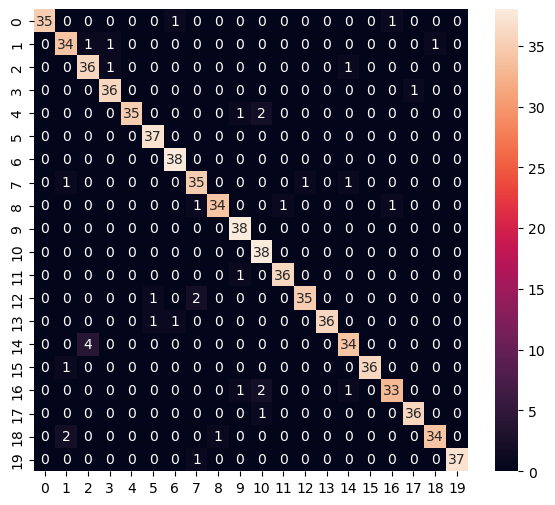

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        37
           1       0.89      0.92      0.91        37
           2       0.88      0.95      0.91        38
           3       0.95      0.97      0.96        37
           4       1.00      0.92      0.96        38
           5       0.95      1.00      0.97        37
           6       0.95      1.00      0.97        38
           7       0.90      0.92      0.91        38
           8       0.97      0.92      0.94        37
           9       0.93      1.00      0.96        38
          10       0.88      1.00      0.94        38
          11       0.97      0.97      0.97        37
          12       0.97      0.92      0.95        38
          13       1.00      0.95      0.97        38
          14       0.92      0.89      0.91        38
          15       1.00      0.97      0.99        37
          16       0.94      0.89      0.92        37
     

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite Convert to Model

In [17]:
# Save as a model for inference only
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform the model (quantize)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\danie\AppData\Local\Temp\tmpwp0zifkx\assets


INFO:tensorflow:Assets written to: C:\Users\danie\AppData\Local\Temp\tmpwp0zifkx\assets


Saved artifact at 'C:\Users\danie\AppData\Local\Temp\tmpwp0zifkx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 43), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)
Captures:
  1977362396432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977517685744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977562546016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977562545312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977562697392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977562697216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977562795168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977562794992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977562897744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977562897568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1977562954032:

28312

# Reasoning test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get input/output tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
input_data = np.array([X_test[0]], dtype=np.float32) #ensures float 32
interpreter.set_tensor(input_details[0]['index'], input_data)

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.7491087e-03 3.7853773e-09 1.2401958e-15 2.4703260e-12 1.1152785e-04
 1.2162386e-07 9.9606919e-01 3.3122867e-13 5.3433871e-07 2.5827832e-08
 1.1298355e-06 1.0158968e-03 1.6434866e-07 1.0460693e-03 8.2522243e-16
 1.7818556e-07 4.5972365e-06 1.0854693e-11 2.5835109e-13 1.4151881e-06]
6
